# Analysis of the FMNIST data using principal component analysis (PCA) and Gaussian mixture models (GMMs)

## Task 1: Dimension reduction 

### Load Data

In [1]:
load("fmnist.rda")
dim(fmnist$x)

[1] 10000   784

In [2]:
range(fmnist$x)

[1]   0 255

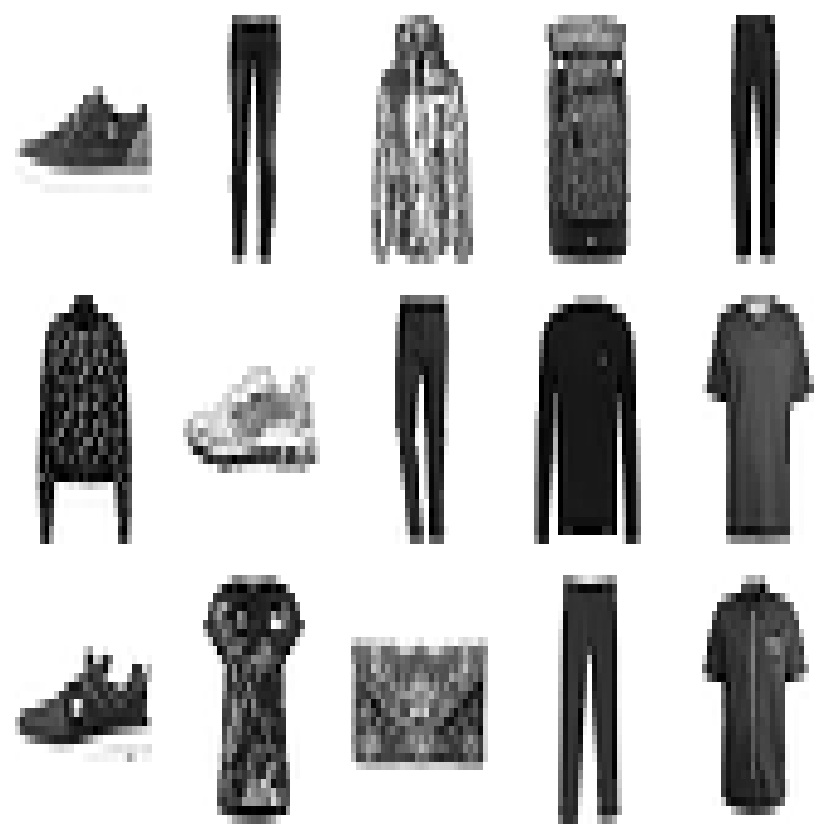

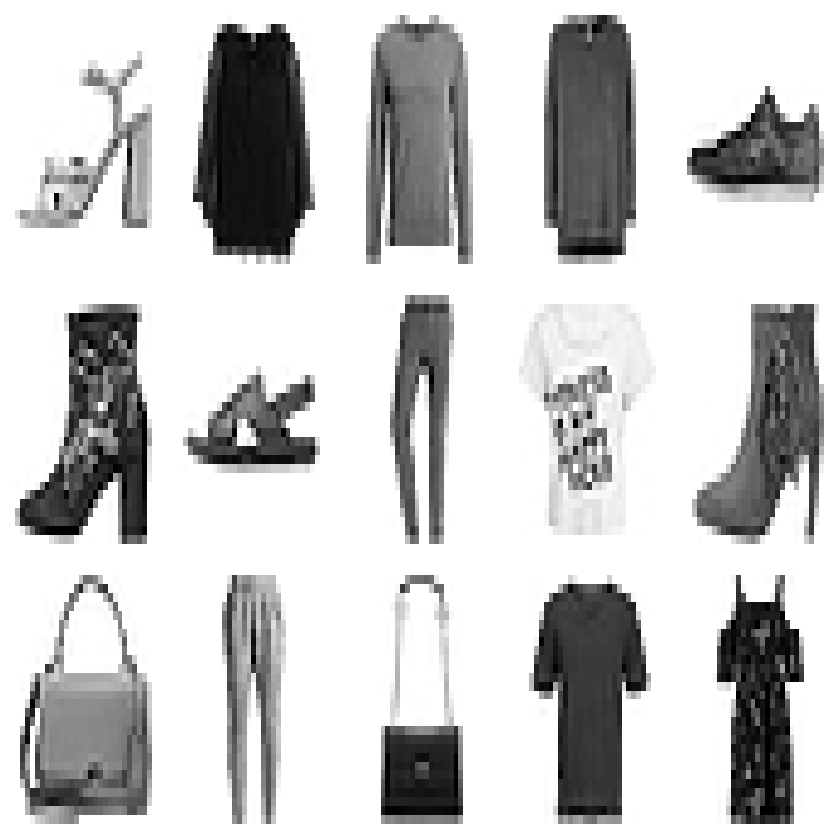

In [36]:
par(mfrow=c(3,5), mar=c(1,1,1,1))
for (k in 1:30) # first 15 images
{
    m <- matrix(fmnist$x[k,], nrow=28, byrow=TRUE)
    image(t(apply(m, 2, rev)), col=grey(seq(1,0,length=256)), axes = FALSE)
}


In [4]:
fmnist$label[1:15] # first 15 labels

[1] 7 1 4 8 1 4 7 1 2 0 7 0 8 1 6
Levels: 0 1 2 3 4 5 6 7 8 9

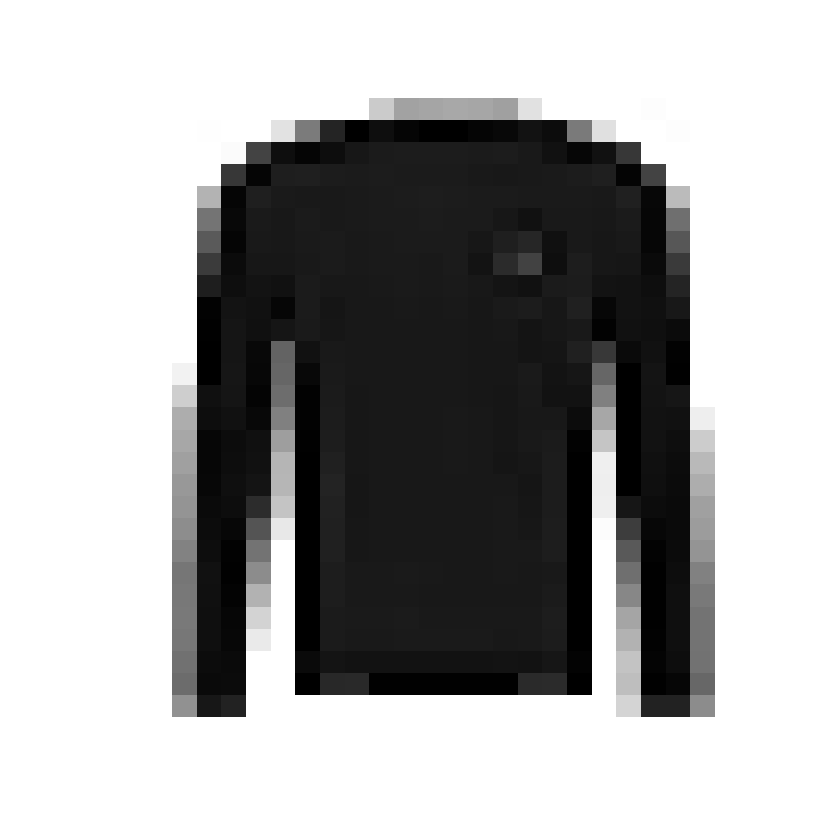

In [5]:
# fmnist$label[10]
m <- matrix(fmnist$x[9,], nrow=28, byrow=TRUE)
image(t(apply(m, 2, rev)), col=grey(seq(1,0,length=256)), axes = FALSE)

In [6]:
# normalise pixel values
X <- (fmnist$x) / 255
# display first 6 rows
head(X)
labels <- fmnist$label

pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,⋯,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0.000000000,0.000000000,0.0000000,⋯,0.000000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0,0,0
0,0,0,0,0,0,0,0.000000000,0.000000000,0.0000000,⋯,0.000000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0,0,0
0,0,0,0,0,0,0,0.003921569,0.000000000,0.0000000,⋯,0.000000000,0.0000000,0.0000000,0.2784314,0.4901961,0.4941176,0.04313725,0,0,0
0,0,0,0,0,0,0,0.035294118,0.203921569,0.3215686,⋯,0.549019608,0.4470588,0.3568627,0.0000000,0.0000000,0.0000000,0.00000000,0,0,0
0,0,0,0,0,0,0,0.000000000,0.000000000,0.0000000,⋯,0.000000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.00000000,0,0,0
0,0,0,0,0,0,0,0.007843137,0.003921569,0.0000000,⋯,0.003921569,0.0000000,0.0000000,0.6823529,0.8627451,0.3058824,0.00000000,0,0,0


In [7]:
fmnist_pca <- prcomp(X)

In [8]:
fmnist_cov <- zapsmall(cov(fmnist_pca$x))
head(fmnist_cov)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC775,PC776,PC777,PC778,PC779,PC780,PC781,PC782,PC783,PC784
PC1,20.10113,0.00000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PC2,0.00000,12.01697,0.000000,0.000000,0.000000,0.000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PC3,0.00000,0.00000,4.024903,0.000000,0.000000,0.000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PC4,0.00000,0.00000,0.000000,3.410785,0.000000,0.000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PC5,0.00000,0.00000,0.000000,0.000000,2.594549,0.000000,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PC6,0.00000,0.00000,0.000000,0.000000,0.000000,2.390179,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
# proportion of variance explained
PoVE <- (fmnist_pca$sdev^2) / sum(fmnist_pca$sdev^2)
# PoVE <- summary(fmnist_pca)$importance[2,]

In [43]:
sum(PoVE[1:30])

[1] 0.8220775

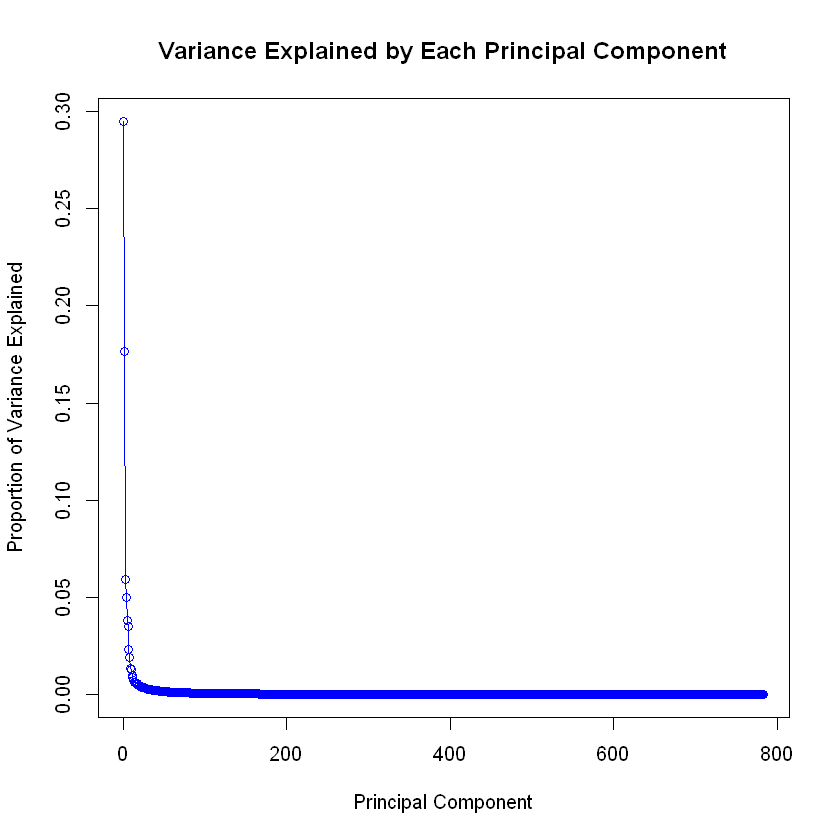

In [44]:
plot(PoVE, type = "o", col = "blue", 
     xlab = "Principal Component", 
     ylab = "Proportion of Variance Explained", 
     main = "Variance Explained by Each Principal Component")

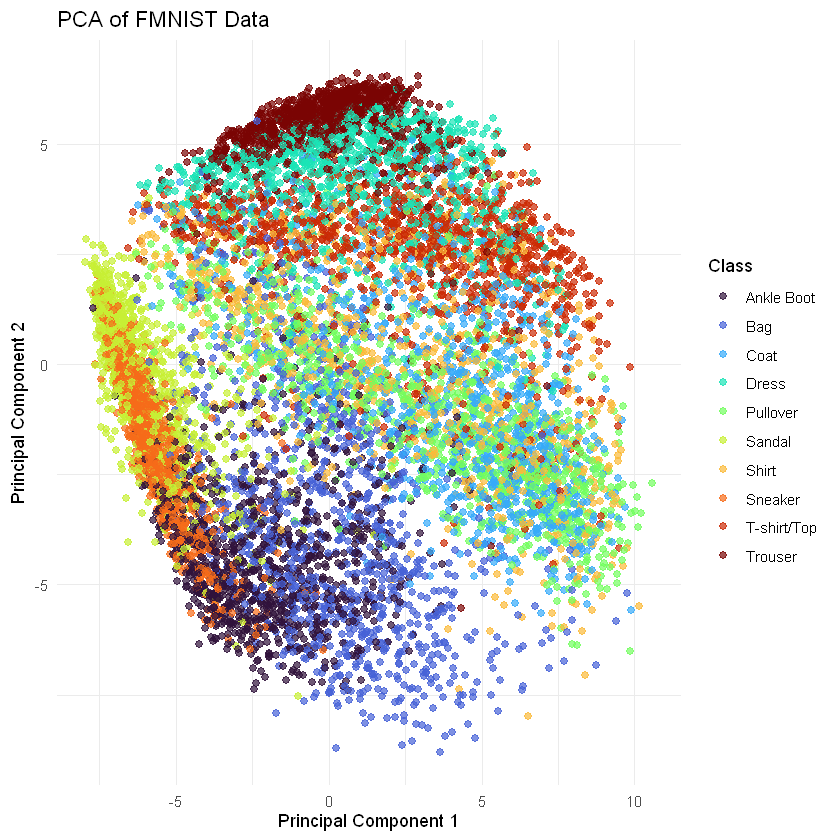

In [45]:
# Assuming you have a vector `labels` with numerical class values (1-10)

# Step 1: Define the mapping between numerical values and class names
class_names <- c(
  "T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
)

# Step 2: Map the numerical labels to class names
label_names <- class_names[labels[1:10000]]  # Replace numerical labels with class names

# Step 3: Create a data frame for visualization
plot_data <- data.frame(
  PC1 = fmnist_pca$x[, 1],  # First principal component
  PC2 = fmnist_pca$x[, 2],  # Second principal component
  Class = factor(label_names)  # Class names as factors
)

# Step 4: Visualize the data using ggplot2
library(ggplot2)

ggplot(plot_data, aes(x = PC1, y = PC2, color = Class)) +
  geom_point(alpha = 0.7, size = 2) +  # Add scatter points
  labs(
    title = "PCA of FMNIST Data",
    x = "Principal Component 1",
    y = "Principal Component 2",
    color = "Class"
  ) +
  theme_minimal() +
  scale_color_viridis_d(option = "H")  # Use a distinct color palette


In [30]:
citation('ggplot2')

To cite ggplot2 in publications, please use

  H. Wickham. ggplot2: Elegant Graphics for Data Analysis.
  Springer-Verlag New York, 2016.

A BibTeX entry for LaTeX users is

  @Book{,
    author = {Hadley Wickham},
    title = {ggplot2: Elegant Graphics for Data Analysis},
    publisher = {Springer-Verlag New York},
    year = {2016},
    isbn = {978-3-319-24277-4},
    url = {https://ggplot2.tidyverse.org},
  }

In [13]:
loadings <- cor(X, fmnist_pca$x) # calculate correlation loadings

Warning message in plot.xy(xy, type, ...):
"plot type 'n,' will be truncated to first character"


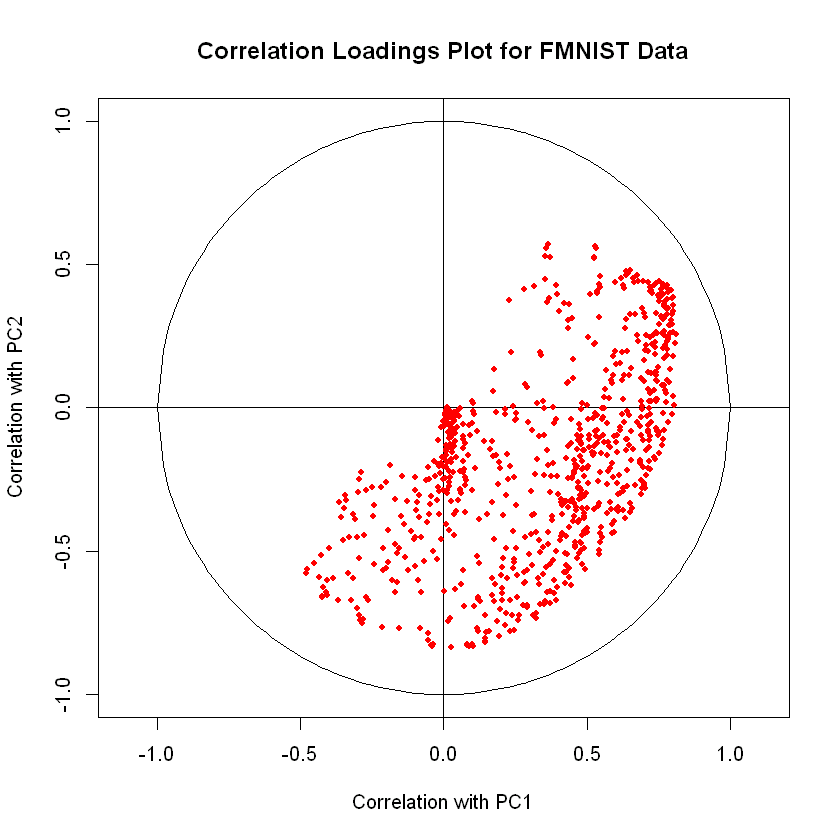

In [14]:
# Correlation loadings
# loadings <- cor(X, fmnist_pca$x) # calculate correlation loadings
plot(1, xlim = c(-1, 1), ylim = c(-1, 1), type = "n,", asp = 1,
     xlab = "Correlation with PC1", ylab = "Correlation with PC2",
     main = "Correlation Loadings Plot for FMNIST Data")
curve((sqrt(1 - x^2)), add = TRUE, from = -1, to = 1)
curve((-sqrt(1 - x^2)), add = TRUE, from = -1, to = 1)
abline(h = 0)
abline(v = 0)
points(loadings[,  1], loadings[, 2], pch = 20, col = "red")
# text( Psi[,1]-0.25, Psi[,2], labels=rownames(Psi), cex=0.7)

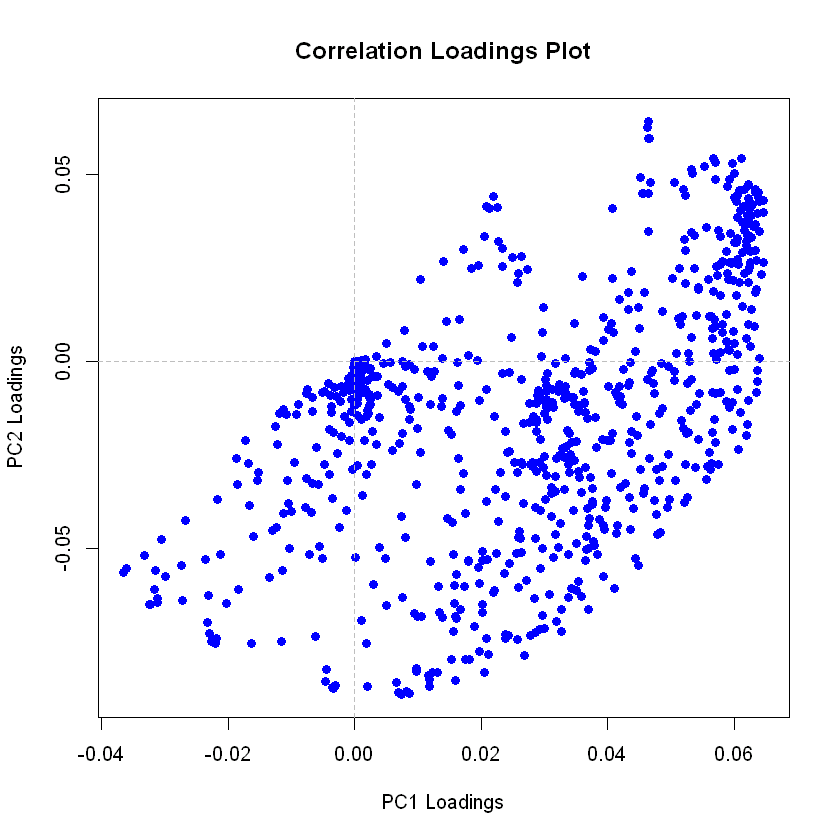

In [15]:
plot(fmnist_pca$rotation[, 1], fmnist_pca$rotation[, 2], 
     xlab = "PC1 Loadings", ylab = "PC2 Loadings", 
     main = "Correlation Loadings Plot", pch = 19, col = "blue")
abline(h = 0, v = 0, lty = 2, col = "gray")  # Add reference lines

In [16]:
# Dimensions of the FMNIST images
img_width <- 28
img_height <- 28

# Get the loadings for the first principal component (PC1)
pc1_loadings <- Psi[, 1]  # Loadings for PC1

# Reshape into 28x28 matrix for visualization
pc1_matrix <- matrix(pc1_loadings, nrow = img_height, ncol = img_width)

# Visualize as a heatmap
image(1:img_width, 1:img_height, pc1_matrix, 
      col = heat.colors(256), xlab = "", ylab = "", 
      main = "Pixel Contributions to PC1")


ERROR: Error: object 'Psi' not found


In [17]:
# Loadings for PC2
pc2_loadings <- Psi[, 2]
pc2_matrix <- matrix(pc2_loadings, nrow = img_height, ncol = img_width)

# Visualize as a heatmap
image(1:img_width, 1:img_height, pc2_matrix, 
      col = heat.colors(256), xlab = "", ylab = "", 
      main = "Pixel Contributions to PC2")


ERROR: Error: object 'Psi' not found


## Part 2

In [18]:
library(mclust) 
pca_10 <- fmnist_pca$x[, 1:10] # select the first 10 principal components
gmm_result <- Mclust(pca_10, G = 2:15) # Compute the GMM with a range of 2:15 clusters
summary(gmm_result) # Output a summary of the results

Warning message:
"package 'mclust' was built under R version 4.4.2"


Package 'mclust' version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 15
components: 

 log-likelihood     n  df       BIC       ICL
      -109997.2 10000 989 -229103.4 -230358.9

Clustering table:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 
837 285 467 504 419 921 595 293 925 918 655 690 886 814 791 

In [28]:
citation("mclust")

To cite 'mclust' R package in publications, please use:

  Scrucca L, Fraley C, Murphy TB, Raftery AE (2023). _Model-Based
  Clustering, Classification, and Density Estimation Using mclust in
  R_. Chapman and Hall/CRC. ISBN 978-1032234953,
  doi:10.1201/9781003277965 <https://doi.org/10.1201/9781003277965>,
  <https://mclust-org.github.io/book/>.

A BibTeX entry for LaTeX users is

  @Book{,
    title = {Model-Based Clustering, Classification, and Density Estimation Using {mclust} in {R}},
    author = {Luca Scrucca and Chris Fraley and T. Brendan Murphy and Adrian E. Raftery},
    publisher = {Chapman and Hall/CRC},
    isbn = {978-1032234953},
    doi = {10.1201/9781003277965},
    year = {2023},
    url = {https://mclust-org.github.io/book/},
  }

Optimal number of clusters: 15 


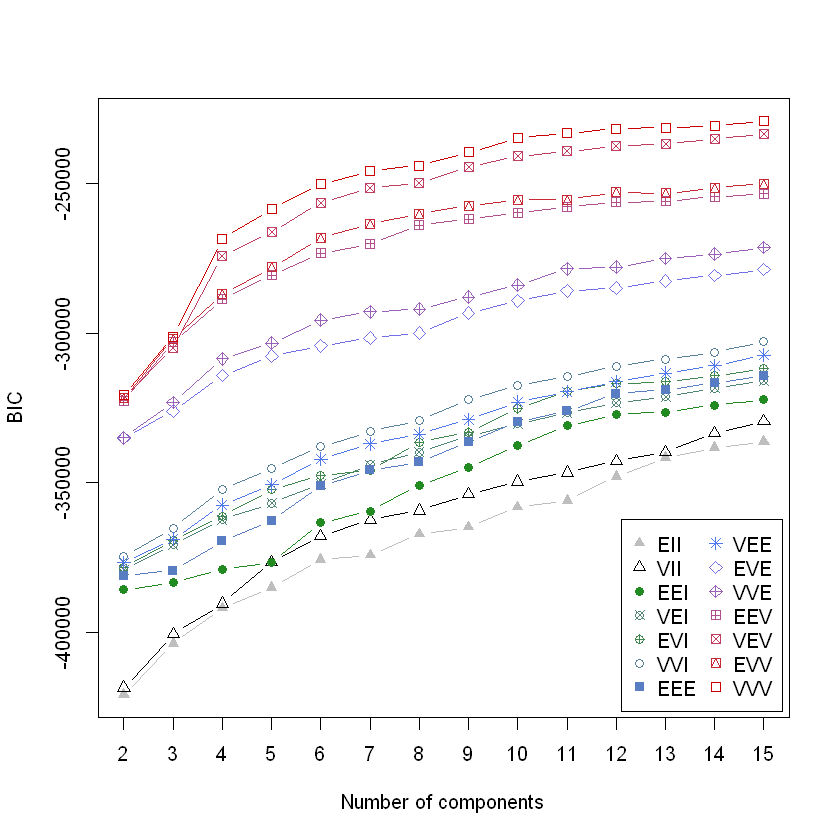

In [19]:
plot(gmm_result, what = "BIC")
# Optimal number of clusters
optimal_clusters <- gmm_result$G
cat("Optimal number of clusters:", optimal_clusters, "\n")

Optimal number of clusters: 15 


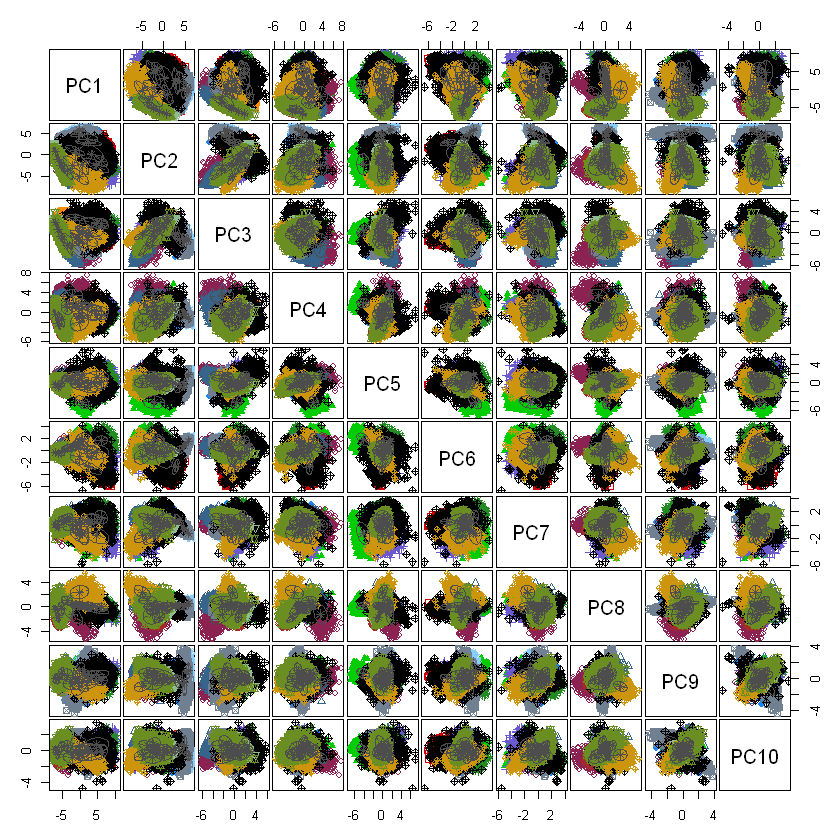

In [154]:
plot(gmm_result, what = "classification")

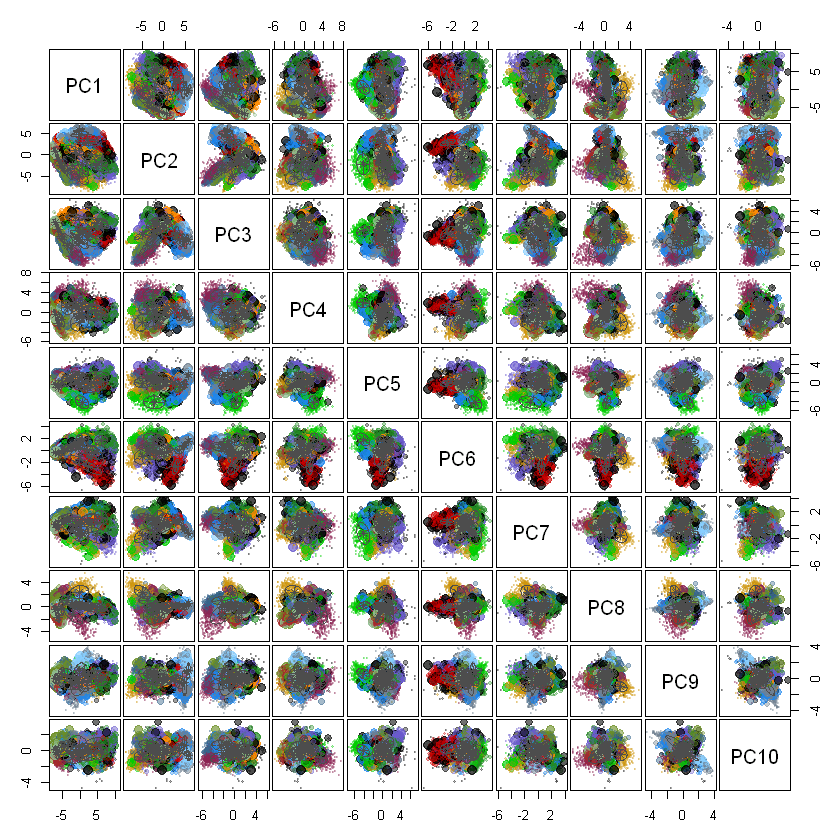

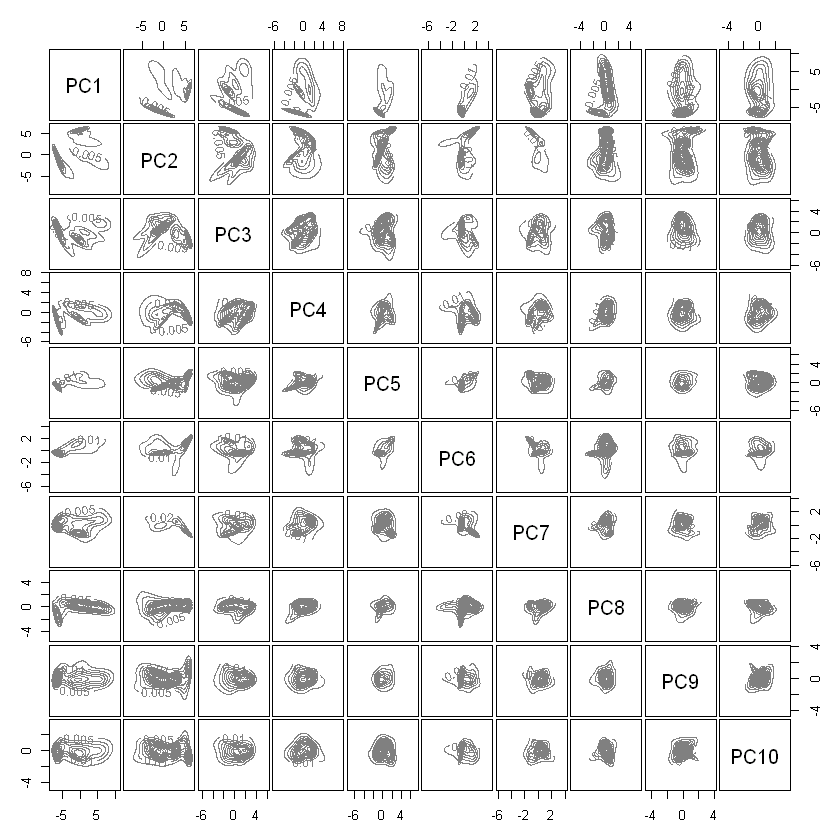

In [156]:
plot(gmm_result, what = "uncertainty")
plot(gmm_result, what = "density")


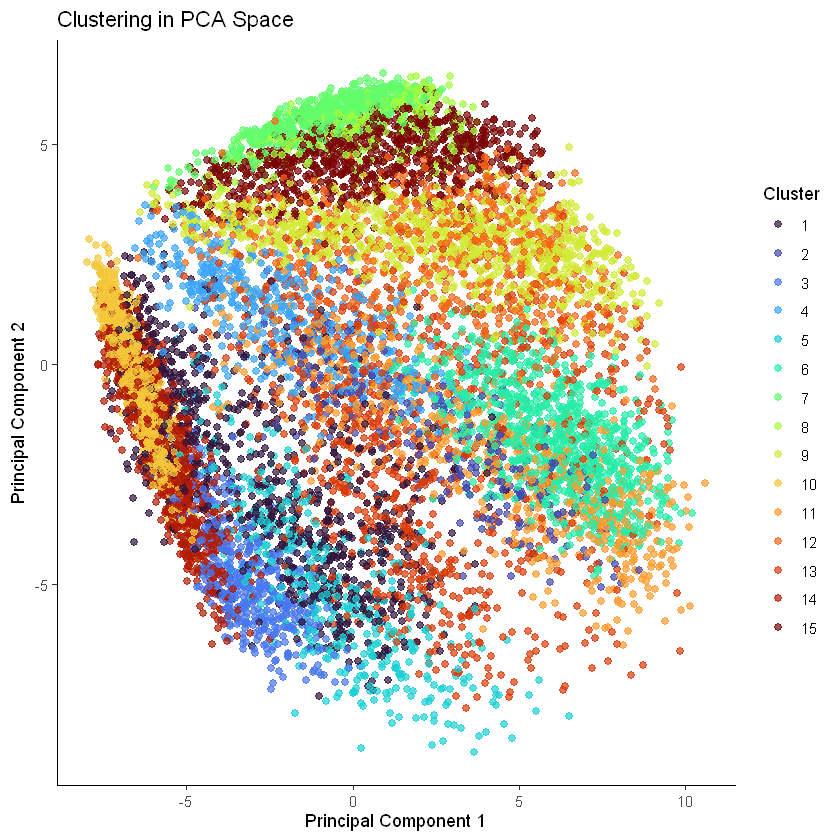

In [46]:
# Load required library
library(ggplot2)

# Assuming you have the following:
# - `pca_data`: A data frame with the first two PCA components (PC1 and PC2)
# - `clusters`: A vector of cluster labels for each data point
# - `labels`: The true labels (if available for comparison)

clusters <- gmm_result$classification

# Create a data frame for ggplot
plot_data <- data.frame(
  PC1 = pca_10[, 1],
  PC2 = pca_10[, 2],
  Cluster = factor(clusters),  # Clustering results
  Label = factor(labels[1:10000])       # Optional: True labels
)

# Scatter plot with clusters as colors
ggplot(plot_data, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(alpha = 0.7, size = 2) +  # Add points
  labs(title = "Clustering in PCA Space", x = "Principal Component 1", y = "Principal Component 2") +
  theme_classic() +
  scale_color_viridis_d(option = "H")  # Use viridis colors for distinct clusters


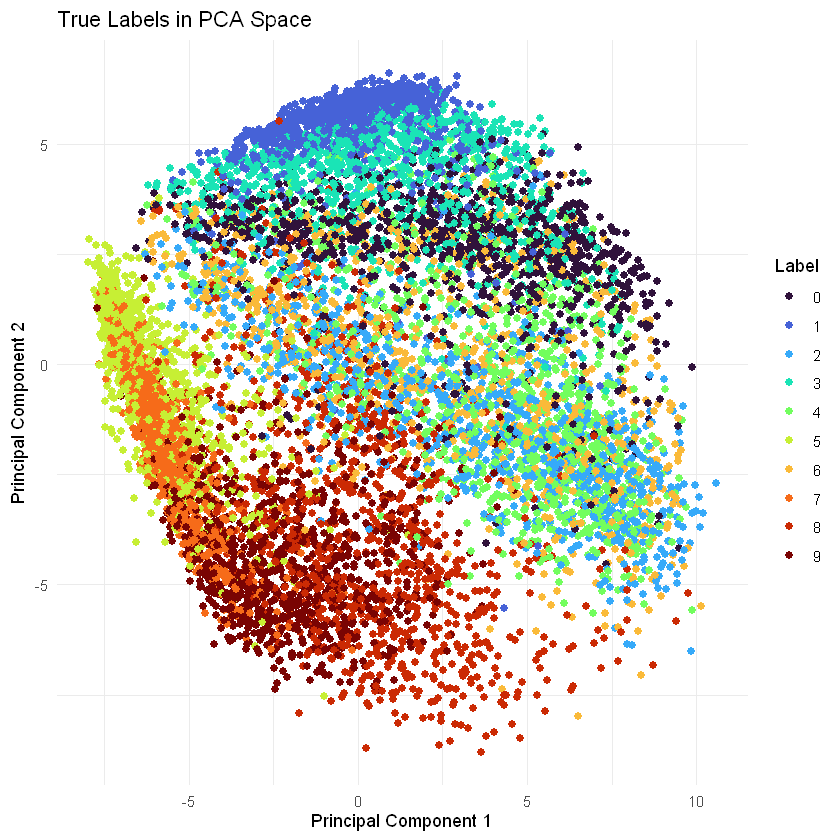

In [47]:
# Scatter plot with true labels as colors
ggplot(plot_data, aes(x = pca_10[, 1], y = pca_10[, 2], color = Label)) +
  geom_point(alpha = 1, size = 2) +  # Add points
  labs(title = "True Labels in PCA Space", x = "Principal Component 1", y = "Principal Component 2") +
  theme_minimal() +
  scale_color_viridis_d(option = "H")  # Use viridis colors for true labels


   
      1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  0   1   0   0  12   1   3   0   0 672   0  32  79 147   0  65
  1   0   9   0   2   0   1 569 293   0   0   2  26   3   0  98
  2   2 135   0 188   0 279   0   0   1   0 340  28  44   0   5
  3   0   0   0   9   0   5  25   0  61   0   6 262  14   0 573
  4   0 109   0  85   1 425   0   0   7   0 124 206  27   0  28
  5 375   0   4   0   2   0   0   0   1 269   0   3   1 329   0
  6   0  31   0 207   5 206   1   0 183   0 142  69 116   0  15
  7  23   0  41   0   0   0   0   0   0 646   0   0   0 345   0
  8   3   1   0   1 410   2   0   0   0   1   9  17 534  11   7
  9 433   0 422   0   0   0   0   0   0   2   0   0   0 129   0

In [60]:
# Create a confusion matrix comoparing true vs predicted labels
confusion_matrix <- table(labels[1:10000], gmm_result$classification)
print(confusion_matrix)
# Calculate the number of correctly classified points
correct_classifications <- sum(apply(confusion_matrix, 1, max))

# Total number of points
total_points <- sum(confusion_matrix)

# Calculate the misclassification rate
misclassification_rate <- 1 - (correct_classifications / total_points)
print(paste("Misclassification Rate:", round(misclassification_rate, 4)))

   
      1   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  0   1   0   0  12   1   3   0   0 672   0  32  79 147   0  65
  1   0   9   0   2   0   1 569 293   0   0   2  26   3   0  98
  2   2 135   0 188   0 279   0   0   1   0 340  28  44   0   5
  3   0   0   0   9   0   5  25   0  61   0   6 262  14   0 573
  4   0 109   0  85   1 425   0   0   7   0 124 206  27   0  28
  5 375   0   4   0   2   0   0   0   1 269   0   3   1 329   0
  6   0  31   0 207   5 206   1   0 183   0 142  69 116   0  15
  7  23   0  41   0   0   0   0   0   0 646   0   0   0 345   0
  8   3   1   0   1 410   2   0   0   0   1   9  17 534  11   7
  9 433   0 422   0   0   0   0   0   0   2   0   0   0 129   0
[1] "Misclassification Rate: 0.5226"


In [56]:
gmm_10 <- Mclust(pca_10, G = 10)
conf_mat10 <- table(labels[1:10000], gmm_10$classification)
conf_mat10

   
      1   2   3   4   5   6   7   8   9  10
  0 659   1   4   0   0 217   0  16  18  97
  1   0   0   0   0   0  31 874   1   3  94
  2   1   1   1   0   0 126   0 522 363   8
  3  63   0   0   0   0 119  50   2  56 665
  4   6   0   3   0   0 133   1 285 500  84
  5   1 346   3 433 198   2   0   0   1   0
  6 180   0   9   0   0 182   1 191 382  30
  7   0  14   0 745 296   0   0   0   0   0
  8   0   3 730   1  17 206   0  23   4  12
  9   0 544   0   8 434   0   0   0   0   0

In [61]:
# Compute the GMM with 10 clusters
gmm_10 <- Mclust(pca_10, G = 10)

# Create a confusion matrix
conf_mat10 <- table(labels, gmm_10$classification)

# Calculate the number of correctly classified points
correct_classifications <- sum(apply(conf_mat10, 1, max))

# Total number of points
total_points <- sum(conf_mat10)

# Calculate the misclassification rate
misclassification_rate <- 1 - (correct_classifications / total_points)
print(paste("Misclassification Rate:", round(misclassification_rate, 4)))

[1] "Misclassification Rate: 0.3884"


In [62]:
conf_mat10

      
labels   1   2   3   4   5   6   7   8   9  10
     0   0  11   5 144 713  39   0  99   0   1
     1   0  23   2   3   2   6 861 105   0   1
     2   0 237 527  77   2 171   0   6   0   2
     3   0  19   1  12  70 197  35 621   0   0
     4   0 131 371  16   9 441   0  44   0   0
     5 435   0   0   2   2   1   0   0 200 344
     6   0 200 289 144 202 117   1  22   0   0
     7 746   0   0   0   0   0   0   0 295  14
     8   1   3   5 945   0   4   0  17  17   4
     9   8   0   0   0   0   0   0   0 440 538